<a href="https://colab.research.google.com/github/Aravinda89/multi_label_classification/blob/main/Pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.0.19 fastcore==1.3.2

     |████████████████████████████████| 188 kB 21.0 MB/s 
     |████████████████████████████████| 46 kB 2.6 MB/s 
     |████████████████████████████████| 748.8 MB 16 kB/s 
     |████████████████████████████████| 5.9 MB 51.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.6.0 which is inc

In [2]:
import fastai
print(fastai.__version__)

2.0.19


In [3]:
from fastai.vision.all import *
from functools import partial

from fastcore.transform import Pipeline

from fastai.callback.fp16 import to_fp16
from fastai.callback.progress import ProgressCallback
from fastai.callback.schedule import fine_tune

from fastai.data.block import DataBlock, MultiCategoryBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import RandomSplitter, RegexLabeller, Normalize

from fastai.metrics import accuracy_multi, BCEWithLogitsLossFlat

from fastai.vision.augment import RandomResizedCrop, aug_transforms
from fastai.vision.core import get_image_files, PILImage
from fastai.vision.data import ImageBlock, imagenet_stats
from fastai.vision.learner import cnn_learner

from torchvision.models.resnet import resnet34

In [4]:
path = untar_data(URLs.PETS)/'images'

In [6]:
len(path.ls())

7393

In [5]:
path.ls()[:3]

(#3) [Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_20.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_202.jpg')]

In [7]:
pets_multi = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
            get_items=get_image_files,
            splitter=RandomSplitter(),
            get_y=Pipeline([RegexLabeller(pat = r'/([^/]+)_\d+.jpg$'), 
                            lambda label: [label]]),
            item_tfms=RandomResizedCrop(460, min_scale=0.75),
            batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])


In [8]:
dls = pets_multi.dataloaders(untar_data(URLs.PETS)/"images",  bs=32)

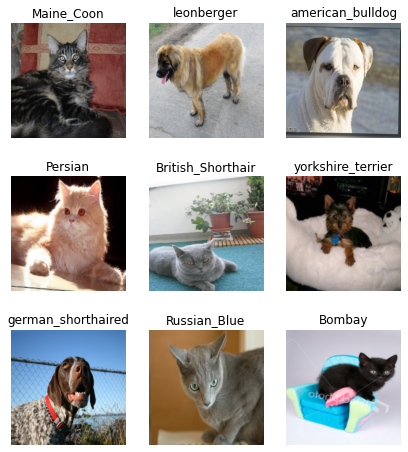

In [10]:
dls.show_batch(max_n=9, figsize=(7,8))

In [11]:
learn = cnn_learner(dls, resnet34, pretrained=True, 
                    metrics=[partial(accuracy_multi, thresh=0.95)], 
                    loss_func=BCEWithLogitsLossFlat(thresh=0.5)).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]